## 통계학 분류
1. Bayesian, Frequentist
2. Descrpitive / Inferential Statistics (기술 / 추론 통계학)
3. Parametric / Nonparametric Statistics (모수 / 비모수 통계학)
4. Univariate / Multivariate Statistics (일변량 / 다변량 통계학)
5. Robust Statistics

# **Part 07 비지도학습 소개**
1. Autoencoder (AE)
2. Generative Adversarial Network (GAN)

# 7-1. AutoEncoder Model
1. AutoEncoder
2. Sparse AutoEncoder
3. Denoisng AutoEncoder
4. Variational AutoEncoder

- NN은 Outlier에 Sensitive함

## 7-1-1. AutoEncoder<br>
### Why AutoEncoder
- 오토인코더는 입력층, 은닉층, 출력층으로 구성된 신경망의 하나로, 심층 신경망(DNN)의 예비훈련(pre-training)을 위해 많이 사용
- 1980년에 등장, Associative memory (연산 메모리)
- 차원 축소 기법, 자료 압축을 위해 나온 모델
- 왜 부활했는가?
    - 2006년 Hinton 교수가 만든 딥러닝은?
    - Restricted Boltman Machine (RBM)
        - hidden layer의 가중치의 초기값을 구하기 위해 사용
    - Bengio, 굳이 RBM말고 AutoEncoder를 사용하자.
    - AutoEncoder로 가중치의 초기값을 구하는 것을 **pre-training**이라고 함
    - 딥러닝은 초기값을 알맞게 부여하는 것이 중요!!
    - 왜 이렇게 초기값 setting을 하는가?
        - outlier에 insensitive해짐
- 오토인코더는 이상탐지(anomaly detection)을 위해 많이 사용
    - 처음에는 compression을 위해 등장
    - 딥러닝 등장 이후, pre-training을 위해 사용
    - 최근에는 anomaly detection에 주로 사용
- classification에서의 고질적인 문제는?
    - unbalance
    - SMOTH, GAN 등으로 증식
    - 그러나 극도로 작다면?
        - anomaly일 가능성이 높음 >> one classification
        - SVDD, 이럴 때 AutoEncoder가 굉장히 편리해짐
        - 학습시킬 때 normal data로 학습시킴
        - 이 후, anomaly data로 reconstruction error를 계산
- 데이터의 효율적인 인코딩을 찾는 방법으로, 데이터 압축 및 복원을 위해 사용될 수 있다.
- Encoder : $h=s_1(W_1x+b_1)$
- Decoder : $\hat{x}=s_2(W_2x+b_2)$
- 오토인코더는 입력값 $x$와 출력값 $\hat{x}$이 같도록 학습한다.
- **최적화** : 역전파 알고리즘 또는 확률적 경사 하강법을 사용
    - $Minimize\;\frac{1}{N}\sum_{n=1}^{N}L(x(n),\hat{x}(n))$
        - $L(x(n),\hat{x}(n))={\parallel{x(n),\hat{x}(n)}\parallel}^2$
        - $L(x(n),\hat{x}(n))=-\sum_{i=1}^{d}\big(x_i(n)*log\hat{x}_i(n)+(1-x_i(n))*log(1-\hat{x}_i(n))\big)$

### AutoEncoders: Hidden Layer Dimensionality
- Smaller than the input
    - Will compress the data, reconstruction of the data far from the training distribution will be difficult
    - Linear-linear encoder-decoder with Euclidian loss is actually equivalent to
    - PCA (under certain data normalization)
    - $\color{Red}{\Rightarrow\text{This is useful for anomaly detection}}$
- Larger than the input
    - No compression needed
    - Can trivially learn to just copy, no structure is learned (unless you regularize)
    - Does not encourage learning of meaningful features (unless you ragularize)

## 7-1-2. Sparse AutoEncoder<br>
- 어떠한 autoencoder는 작동하지 않게 만드는 것
- dropout과 비슷한 효과를 줌 (확률적으로)
    - dropout 왜함? overfitting > generalized >> Predictiability
    - in CNN, BatchNormalization, mini Batch
    - 이 모든 것은 Data Adaptive
    - Learning from data (통계학도는 싫어함..)
- **최적화** :
    - $Minimize\;\frac{1}{N}\sum_{n=1}^{N}L(x(n),\hat{x}(n))+{\lambda}({\parallel}W_1{\parallel}^2+{\parallel}W_2{\parallel}^2)+\beta\sum_{j=1}^{m}KL\big(\rho{\parallel}\hat{\rho}_j\big)$
        - $W^1$; 입력층에서 히든층으로 가는 weight
        - $W^2$; 히든층에서 출력층으로 가는 weight
        - ${\lambda}$: 가중치 감소를 촉진하는 벌칙항을 조정하는 매개변수
        - ${\beta}$: 희박성 벌칙항을 조정하는 매개변수
        - $KL\big(\rho{\parallel}\hat{\rho}_j\big)=\rho\,log{\frac{\rho}{\hat{p}_j}}+(1-\rho)\,log{\frac{1-\rho}{1-\hat{\rho}_j}}$
            - $\hat{\rho}_j=\frac{1}{N}\sum_{n=1}^{N}h_j(x(n))$ : j번째 은닉노드의 활성함수값의 평균
    - $Minimize\;\frac{1}{N}\sum_{n=1}^{N}L(x(n),\hat{x}(n))+{\lambda}{\parallel}W{\parallel}^2+\beta\sum_{j=1}^{m}KL\big(\rho{\parallel}\hat{\rho}_j\big)$
        - 제약조건: $W_2=W_{1^t}$

## 7-1-3. Denoising AutoEncoder<br>
- AutoEncoder는 입력과 출력 노드의 수가 가능한 똑같게 출력
- Denoising AutoEncoder는 input에 noise를 섞어서 넣고 출력은 noise가 없게 나오게 만듬

### Why Denoising AutoEncoder?
- 입력벡터에 잡음이 포함될 때 이를 제거하여 입력벡터를 복원하기 위한 오토인코더
- 보안 쪽에서, 악성코드를 판별하는 알고리즘에서 큰 활약을 보임

### 잡음 제거 오토인코더 모형
- 원래 입력벡터 : x
- 잡음이 추가된 입력: $\tilde{x}{\,\sim\,}q_D(\tilde{x}|x)$
    - Gaussian noise: $\tilde{x}|x{\,\sim\,}N(x|\sigma^2I)$
    - Salt-and-pepper noise: $x$의 일부 원소를 임의의 0으로 만드는 방법
    - Masking noise: $x$의 일부 원소를 임의로 해당 변수의 최솟값 또는 최댓값으로 만드는 방법
- $h=s_1(W^1\tilde{x}+b^1)$
- $\tilde{x}=s_2(W^2h+b^2)$
- Randomly set inputs to zero (like dropout on inputs)
- Target output has imssing features filled in.

### Stacked (deep) AEs and Denoising AEs
- What can we do with them?

## 7-1-4. Variational AutoEncoder<br>

### 변분 오토인코더 모형
- latent vector들이 정규분포를 따르도록 학습을 진행
    - 정확히는 다변량 정규분포를 따르도록!
    $$\vec{h}=\begin{pmatrix} h_1 \\ \vdots \\ h_m  \end{pmatrix}$$
    $$for\;i=1,2,\ldots,n,\quad\vec{h}_1,\,\vec{h}_2,\,\ldots,\vec{h}_n\,\sim\,N_m(\mu,\sum(covariance))$$
- Encoder에서 RNN을 사용할 수도 있다(이게 무슨 말!?!?!?!??!)
- 변분 오토인코더 모형 (Variational Inference)
- VAE(variational autoencoder, 변분 오토인코더) was introduced by Kingma and Welling(2013) and has quickly become one of the most popular types of AEs.
- VAEs are quite diffenent from all the AEs:
    - VAEs are **probailistic** AEs
    - VAEs are **generatie** AEs

### VAE 원리
- VAE의 인코더 및 디코더
![title](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTpEq4EuUdUyq8fMY_qG4fXeEqtPCKFxWIR82nCPNPcMiQk4pc2CQ)
    - $q_{\Phi}(z|x)$ : 데이터 x가 주어질 때 잠재변수 z의 근사적 사후 (posterior) 분포
    - $p_{\theta}(x|z)$ : 잠재변수 z가 주어질 때 데이터 x의 가능도 (likelihood)
    - $f(x,\,\Phi)$ outputs the parameter of the approximate posterior of $q_{\Phi}(z|x)$
    - $g(z,\,\theta)$ outputs the parameter of the approximate posterior of $p_{\theta}(x|z)$
- VAE의 목적함수: Assume that i.i.d
$$log\,p_{\theta}\big(x(1),\cdots,x(N)\big)=\sum_{i=1}^{N}log\,p_{\theta}\big(x(i)\big)$$
    - $log\,p_{\theta}(x)=KL\big(q_{\Phi}(z|x)\,{\parallel}\,p_{\theta}(z|x)\big)+L(\theta,\Phi;x)$ ------------ (\*)
    - $p_{\theta}(z|x)$ : 잠재변수 z의 사후 (posterior) 분포
    - $q_{\Phi}(z|x)$ : 잠재변수 z의 근사적 사후분포
    - $p_{\theta}$ : 잠재변수 z의 사전(prior) 분포
    - $KL\big(q_{\Phi}(z|x)\,{\parallel}\,p_{\theta}(z|x)\big)$ : 근사적 사후분포들의 Kullback-Leibler 발산(거리는 아님)
    
- (\*)의 증명:
$$\begin{align}{}
log\,p_{\theta}(x)
&=\sum_{z}q_{\Phi}(z|x)log\,p_{\theta}(x)=\sum_{z}q_{\phi}(z|x)log(\frac{p_{\theta}(z,x)}{p_{\theta}(z|x)})\\
&\sum_{z}q_{\Phi}(z|x)log\big(\frac{p_{\theta}(z,x)q_{\Phi}(z|x)}{q_{\Phi}(z|x)p_{\theta}(z|x)}\big)
\end{align}$$

# 7-2. Generative Adversarial Networks
1. Vanilla Generative Adversarial Network (GAN)
2. Least Squares GAN (LSGAN)
3. Deep convolutional GAN (DCGAN)
4. CycleGAN

## 7-2-1. Vanilla GAN<br>
### Why Generative Models?
- **분류**모형 또는 **판별**(discriminative) 모형:
    - Given an image $x$, predict a label $y$
    - Estimate $p(y|x)$
- **분류**모형 또는 **판별**모형의 주요한 단점:
    - Can't model $p(x)$, i.e. the probability of seeing a certain image
    - Thus, can't sample from $p(x)$, i.e. can't generate new images
- **생성**(generative) 모형은 분류모형 및 판별모형의 **단점**을 극복한다.
    - Can model $p(x)$
    - Can generate new images
- GAN은 2014년에 Goodfellow가 주도한 몬트리올대학교의 연구그룹이 소개한 모형
- 딥러닝 관련 저명한 연구자이자 페이스북 AI 연구의 책임자인 LeCun은 GAN을 딥러닝에서 가장 중요한 개발 중 하나이고 기계학습에서 지난 10년 동안 가장 흥미로운 아이디어였다고 말함
- GAN은 참가자 2명이 참여하는 Zero-Sum 게임에 기초를 둠
- GAn은 서로 경쟁하는 2개의 신경망인 생성자(generator)와 판별자(discriminator)로 구성
- G는 진짜 데이터와 G에 의해 생성된 가짜 데이터를 구별할 수 없도록 D를 속이는 것이 목적. 그리고 D는 진짜 데이터를 가짜 데이터와 구별하기 위해 학습. 일정 기간 D와 G는 서로 경쟁하면서 자신의 업무를 개선해나간다.
- GAN 관련 게임이론 문제에서 최적의 해결책은 **Nash 균형**에 의해 주어진다.
    - Nash 균형에 이르면 G는 진짜 데이터의 분포와 동일한 분포를 가지는 가짜 데이터를 생성, D는 진짜 데이터와 가짜 데이터에 대해 각각 확률 50%를 출력한다.
    - $\rightarrow$ 게임이론에서 Nash 균형은 참가자들이 최선의 선택을 하면 서로가 자신의 선택을 바꾸지 않는 균형 상태를 의미
- GAN은 주어진 분포에 의해 생성된 진짜 데이터와 같은 가짜 데이터를 생성하기 위한 생성모형으로 사용
- GAN은 이미지 생성, 이미지 인페인팅(inpainting), 추상화 추론(avstraction reasoning), 의미론적 분할(semantic segmentation), 비디오 생성, 텍스트로부터 이미지 생성 등의 응용에 활용

### 기본 GAN 모형
- ㄹㅇㄴㅁ

### 기본 GAN 문제점
- **비수렴성**
    - 매개변수들이 Nash 균형상태에 들어가지 못하고 진동함
- **모드 붕괴**
    - 비슷한 이미지, 물질만 생성해냄
- **기울기 소실 문제**
- **Overfitting**
- hyperparameter에 굉장히 민감

## 7-2-2. LSGAN


## 7-2-3. DCGAN<br>
### Why DCGAN?
- CNN을 사용하자!
    - 기존의 CNN은 이미지를 줄이는 마인드
    - 여기에서는 이미지를 확장시킬 수 있음
    - Alphafold가 적용한 아이디어
- 기본 GAN은 MNIST와 같은 비교적 단순한 이미지에 대해서는 좋은 결과를 보이지만 CIFAR-10, ImageNet과 같은 복잡한 이미지에 대해서는 안정된 결과를 보장하지 못함
- 기본 GAN이 이론적으로는 최적해를 구할 수 있다고 하지만, 이 최적해는 Nash 균형에 의해 주어진다는 한계점 때문에 학습 시 안정성이 떨어지는 단점이 있다.
- 이러한 문제점을 보완하기 위해 Radford 등(2015)은 CNN을 기본 GAN에 적용하는 DCGAN(deep convolutional GAN)을 개발
- DCGAN은 이미지 분류에서 탁월한 성능을 보여주는 CNN을 적용함으로써 고화질 이미지를 생성할 수 있는 모형
- 이후에 나오는 GAN 관련 연구는 대부분의 DCGAN을 기반으로 할 정도로, DCGAN은 잘 확립된 구조를 가지고 있다. DCGANㅡ이 성공은 GAN이 유명해지는 데 결정적인 역활을 하였다.

## 7-2-4. CycleGAN<br>
### Why CycleGAN?
- **CycleGAN**은 Zhu 등(2017)이 개발한 방법으로서, 인물 사진을 모네 작품 형식이나 고흐 작품

### CycleGAN


## CycleGAN 코드 실습

In [3]:
# 필요한 라이브러리 불러들임 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as Im
import os
import glob

In [4]:
# 그래프 리셋
tf.reset_default_graph() 
# 재현성을 위해 시드 지정
tf.set_random_seed(1)

In [8]:
#--------------------------------------------------
# data 불러오기
#--------------------------------------------------
 
#os.chdir('C:/Users/admin/Dropbox/저서/텐서플로_딥러닝/GANs_tensorflow/')
files = glob.glob('./AE_Gan/face20/*.png')

img = []
for file in files:
    a = Im.open(file) 
    a = a.convert('L') # 흑백화면으로 
    a1 = np.array(a)
    img.append(a1)   
    
xr = np.asarray(img) / 255. # convert list to array

nr = np.prod(xr.shape[1:3]) # 45*40=1800
Xr = np.reshape(xr, [len(img), nr]) #=[20,1800]

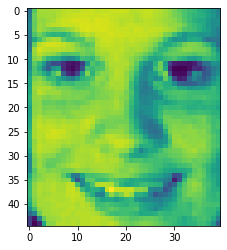

In [22]:
plt.imshow(Xr[0].reshape(45, 40))

In [12]:
xr.shape

(20, 45, 40)

In [10]:
Xr.shape

(20, 1800)

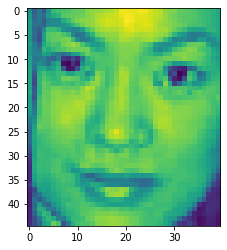

In [62]:
plt.imshow(Xr[14].reshape(45, 40))

In [58]:
import scipy.ndimage.interpolation
# Real image
X_rA = Xr[:10]
# Rotated image
X_rB = Xr[10:].reshape(-1, 45, 40)
X_rB = scipy.ndimage.interpolation.rotate(X_rB, angle=90, axes=(1, 2))
X_rB = X_rB.reshape(-1, 45*40)

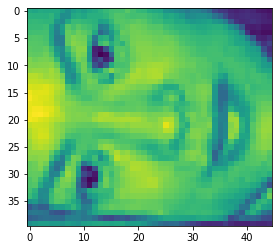

In [59]:
plt.imshow(X_rB[4].reshape(40, 45))

In [64]:
# divide to train and test
XA=X_rA[0:2,:]
X_trainA=X_rA[2:10,:]
XB=X_rB[0:2,:]
X_trainB=X_rB[2:10,:]

XA.shape, X_trainA.shape, XB.shape, X_trainB.shape

((2, 1800), (8, 1800), (2, 1800), (8, 1800))

In [65]:
# 훈련용과 시험용 이미지 개수와 입력 변수의 수
sample_size= X_trainA.shape[0]
sample_size_test= XA.shape[0]
X_dim = X_trainA.shape[1]

sample_size, sample_size_test, X_dim

(8, 2, 1800)

In [72]:
#-------------------------------------------
# 매개변수 설정
#-------------------------------------------

learning_rate = 0.001
batch_size = 2
epochs = 600
h_dim = 128

- tensorboard

In [67]:
import tensorflow as tf
tf.reset_default_graph()

In [68]:
# 입력 이미지 placeholder
X_A = tf.placeholder(tf.float32, shape=[None, X_dim])
X_B = tf.placeholder(tf.float32, shape=[None, X_dim])

# 판별자의 가중치와 편의(# 사비에르 초기치 사용)
D_A_W1 = tf.get_variable(name='D_A_W1',shape=[X_dim, h_dim],
                         initializer=tf.contrib.layers.xavier_initializer())
D_A_b1 = tf.Variable(tf.zeros([h_dim]))
D_A_W2 = tf.get_variable(name='D_A_W2', shape=[h_dim, 1],
                         initializer=tf.contrib.layers.xavier_initializer())
D_A_b2 = tf.Variable(tf.zeros([1]))

D_B_W1 = tf.get_variable(name='D_B_W1', shape=[X_dim, h_dim],
                         initializer=tf.contrib.layers.xavier_initializer())
D_B_b1 = tf.Variable(tf.zeros(shape=[h_dim]))
D_B_W2 = tf.get_variable(name='D_B_W2', shape=[h_dim, 1],
                         initializer=tf.contrib.layers.xavier_initializer())
D_B_b2 = tf.Variable(tf.zeros([1]))

# 생성자의 가중치와 편의(# 사비에르 초기치 사용)
G_AB_W1 = tf.get_variable(name='D_AB_W1', shape=[X_dim, h_dim],
                          initializer=tf.contrib.layers.xavier_initializer())
G_AB_b1 = tf.Variable(tf.zeros([h_dim]))
G_AB_W2 = tf.get_variable(name='D_AB_W2', shape=[h_dim, X_dim],
                          initializer=tf.contrib.layers.xavier_initializer())
G_AB_b2 = tf.Variable(tf.zeros([X_dim]))

G_BA_W1 = tf.get_variable(name='D_BA_W1', shape=[X_dim, h_dim],
                          initializer=tf.contrib.layers.xavier_initializer())
G_BA_b1 = tf.Variable(tf.zeros([h_dim]))
G_BA_W2 = tf.get_variable(name='D_BA_W2', shape=[h_dim, X_dim],
                          initializer=tf.contrib.layers.xavier_initializer())
G_BA_b2 = tf.Variable(tf.zeros([X_dim]))


# 모수 모음
theta_DA = [D_A_W1, D_A_W2, D_A_b1, D_A_b2]
theta_DB= [ D_B_W1, D_B_W2, D_B_b1, D_B_b2]
theta_G = [G_AB_W1, G_AB_W2, G_AB_b1, G_AB_b2,
           G_BA_W1, G_BA_W2, G_BA_b1, G_BA_b2]

#------------------------------------------------
# 생성자 정의:
#------------------------------------------------
def G_AB(X):
    h1 = tf.nn.relu(tf.matmul(X, G_AB_W1) + G_AB_b1)
    return tf.nn.sigmoid(tf.matmul(h1, G_AB_W2) + G_AB_b2)


def G_BA(X):
    h1 = tf.nn.relu(tf.matmul(X, G_BA_W1) + G_BA_b1)
    return tf.nn.sigmoid(tf.matmul(h1, G_BA_W2) + G_BA_b2)

#------------------------------------------------
# 판별자 정의:
#------------------------------------------------
def D_A(X):
    h1 = tf.nn.relu(tf.matmul(X, D_A_W1) + D_A_b1)
    return tf.nn.sigmoid(tf.matmul(h1, D_A_W2) + D_A_b2)


def D_B(X):
    h1 = tf.nn.relu(tf.matmul(X, D_B_W1) + D_B_b1)
    return tf.nn.sigmoid(tf.matmul(h1, D_B_W2) + D_B_b2)

# 생성(변형)결과 
X_AB = G_AB(X_A)
X_BA = G_BA(X_B)


# 판별자 D_A 결과 
D_A_real = D_A(X_A)
D_A_fake = D_A(X_BA)

# 판별자 D_B 결과
D_B_real = D_B(X_B)
D_B_fake = D_B(X_AB)

# 복원( x -> G(x)-> F(G(x)-> x))
X_ABA = G_BA(X_AB)

# 복원( y -> F(x)-> G(F(x)-> y))
X_BAB = G_AB(X_BA)


# 판별자 비용함수 (LSGAN 적용)
DA_loss = 0.5 * (tf.reduce_mean((D_A_real - 1)**2)+ 0.5*tf.reduce_mean(D_A_fake**2))
DB_loss = 0.5 * (tf.reduce_mean((D_B_real - 1)**2)+ 0.5*tf.reduce_mean(D_B_fake**2))

# 생성자 비용함수
GAB_loss = 0.5 * tf.reduce_mean((D_A_fake - 1)**2) + \
           0.5 * tf.reduce_mean((D_B_fake - 1)**2)

# 복원에 대한 비용함수
C_loss = tf.reduce_mean(tf.abs(X_A - X_ABA)) + \
         tf.reduce_mean(tf.abs(X_B - X_BAB))
G_loss = GAB_loss + C_loss


# Optimizer
DA_solver = tf.train.AdamOptimizer(learning_rate).minimize(DA_loss, var_list=theta_DA)
DB_solver = tf.train.AdamOptimizer(learning_rate).minimize(DB_loss, var_list=theta_DB)
G_solver = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=theta_G)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [69]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./tensordata/logs', sess.graph)

In [74]:
sample_size, batch_size, int(sample_size / batch_size)

(8, 2, 4)

In [87]:
for i in range(int(sample_size / batch_size)):
    if i != int(sample_size / batch_size):
        print(i)
    else:
        print('코드를 왜 이따구로 짜놓냐!')

0
1
2
3


In [84]:
i = 3
X_trainA[i * batch_size : (i + 1) * batch_size]

array([[0.82745098, 0.69803922, 0.68627451, ..., 0.63921569, 0.74117647,
        0.72941176],
       [0.11764706, 0.08627451, 0.07058824, ..., 0.66666667, 0.58039216,
        0.58823529]])

Epoch: 1
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2494  Generator Loss = 0.4622  Avg Loss = 0.8925
Epoch: 2
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.4046  Avg Loss = 0.8561
Epoch: 3
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.3538  Avg Loss = 0.8003
Epoch: 4
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.3248  Avg Loss = 0.7612
Epoch: 5
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.3098  Avg Loss = 0.7460
Epoch: 6
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.3063  Avg Loss = 0.7378
Epoch: 7
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.3031  Avg Loss = 0.7349
Epoch: 8
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.3029  Avg Loss = 0.7327
Epoch: 9
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 

Epoch: 74
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.2470  Avg Loss = 0.6901
Epoch: 75
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.2456  Avg Loss = 0.6869
Epoch: 76
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.2556  Avg Loss = 0.6890
Epoch: 77
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.2494  Avg Loss = 0.6862
Epoch: 78
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.2409  Avg Loss = 0.6857
Epoch: 79
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.2383  Avg Loss = 0.6845
Epoch: 80
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.2362  Avg Loss = 0.6825
Epoch: 81
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.2411  Avg Loss = 0.6834
Epoch: 82
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generato

Epoch: 145
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.1515  Avg Loss = 0.6518
Epoch: 146
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.1544  Avg Loss = 0.6500
Epoch: 147
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.1501  Avg Loss = 0.6487
Epoch: 148
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.1503  Avg Loss = 0.6491
Epoch: 149
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.1491  Avg Loss = 0.6487
Epoch: 150
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.1471  Avg Loss = 0.6484
Epoch: 151
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.1536  Avg Loss = 0.6496
Epoch: 152
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.1474  Avg Loss = 0.6497
Epoch: 153
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500 

Epoch: 216
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0929  Avg Loss = 0.6206
Epoch: 217
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0853  Avg Loss = 0.6205
Epoch: 218
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0933  Avg Loss = 0.6229
Epoch: 219
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0857  Avg Loss = 0.6190
Epoch: 220
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0836  Avg Loss = 0.6170
Epoch: 221
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0841  Avg Loss = 0.6181
Epoch: 222
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0853  Avg Loss = 0.6190
Epoch: 223
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0887  Avg Loss = 0.6182
Epoch: 224
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500 

Epoch: 288
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0662  Avg Loss = 0.6028
Epoch: 289
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0639  Avg Loss = 0.6036
Epoch: 290
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0638  Avg Loss = 0.6009
Epoch: 291
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0655  Avg Loss = 0.6039
Epoch: 292
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0592  Avg Loss = 0.5992
Epoch: 293
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0646  Avg Loss = 0.6026
Epoch: 294
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0589  Avg Loss = 0.6002
Epoch: 295
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0733  Avg Loss = 0.6062
Epoch: 296
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500 

Epoch: 362
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0490  Avg Loss = 0.5858
Epoch: 363
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0568  Avg Loss = 0.5883
Epoch: 364
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0476  Avg Loss = 0.5863
Epoch: 365
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0475  Avg Loss = 0.5826
Epoch: 366
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0540  Avg Loss = 0.5851
Epoch: 367
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0495  Avg Loss = 0.5861
Epoch: 368
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0627  Avg Loss = 0.5899
Epoch: 369
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0538  Avg Loss = 0.5864
Epoch: 370
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500 

Epoch: 437
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0489  Avg Loss = 0.5722
Epoch: 438
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0399  Avg Loss = 0.5697
Epoch: 439
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0455  Avg Loss = 0.5680
Epoch: 440
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0470  Avg Loss = 0.5670
Epoch: 441
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0362  Avg Loss = 0.5648
Epoch: 442
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0390  Avg Loss = 0.5644
Epoch: 443
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0458  Avg Loss = 0.5670
Epoch: 444
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0514  Avg Loss = 0.5682
Epoch: 445
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500 

Epoch: 508
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0337  Avg Loss = 0.5544
Epoch: 509
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0344  Avg Loss = 0.5534
Epoch: 510
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0491  Avg Loss = 0.5595
Epoch: 511
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0666  Avg Loss = 0.5662
Epoch: 512
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0486  Avg Loss = 0.5661
Epoch: 513
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0463  Avg Loss = 0.5602
Epoch: 514
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0389  Avg Loss = 0.5558
Epoch: 515
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0364  Avg Loss = 0.5540
Epoch: 516
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500 

Epoch: 579
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0370  Avg Loss = 0.5442
Epoch: 580
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0491  Avg Loss = 0.5484
Epoch: 581
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0455  Avg Loss = 0.5535
Epoch: 582
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0402  Avg Loss = 0.5516
Epoch: 583
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0330  Avg Loss = 0.5483
Epoch: 584
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0470  Avg Loss = 0.5508
Epoch: 585
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0344  Avg Loss = 0.5437
Epoch: 586
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500  Generator Loss = 0.0378  Avg Loss = 0.5448
Epoch: 587
  DiscriminatorA Loss = 0.2500  DiscriminatorB Loss = 0.2500 

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warnin

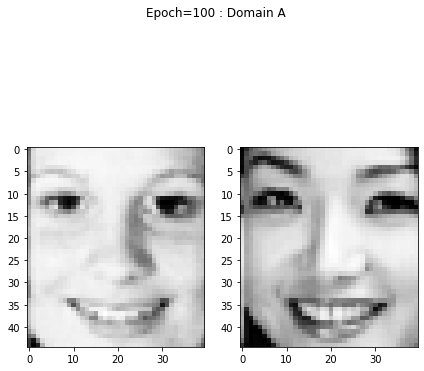

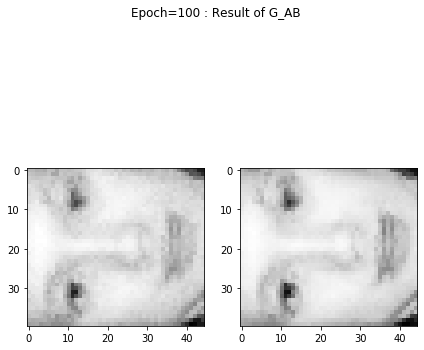

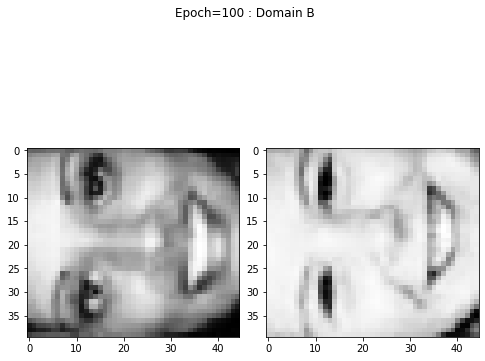

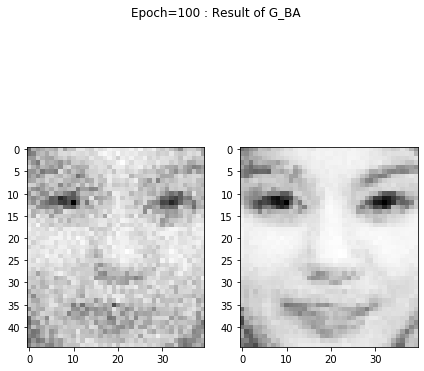

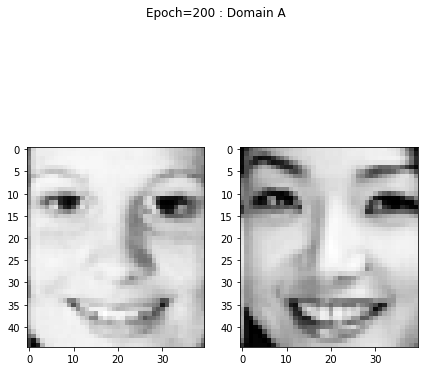

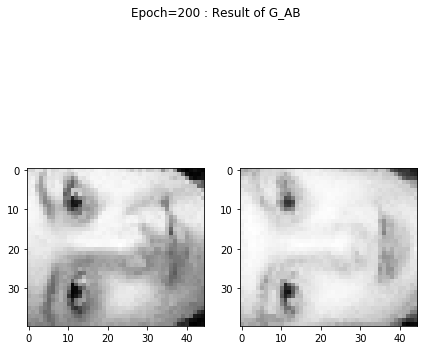

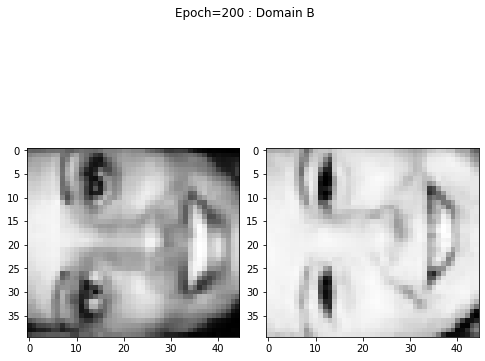

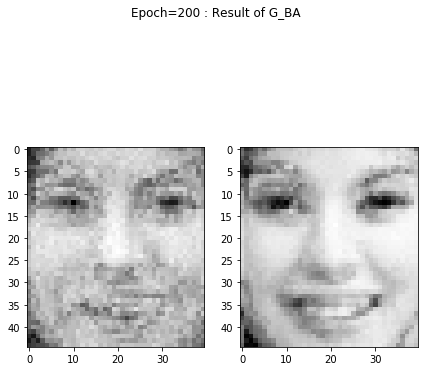

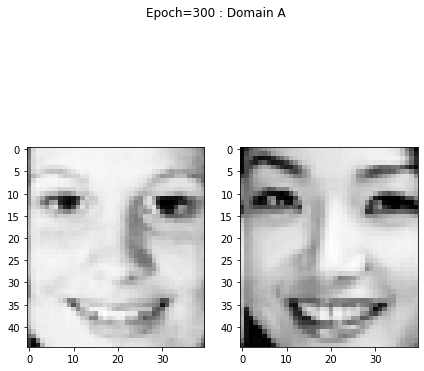

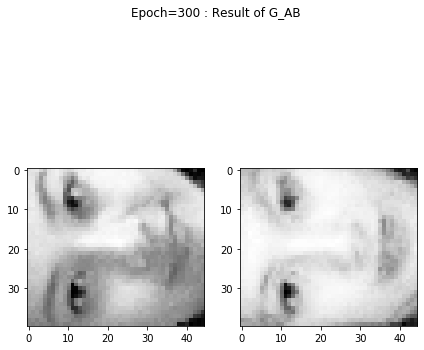

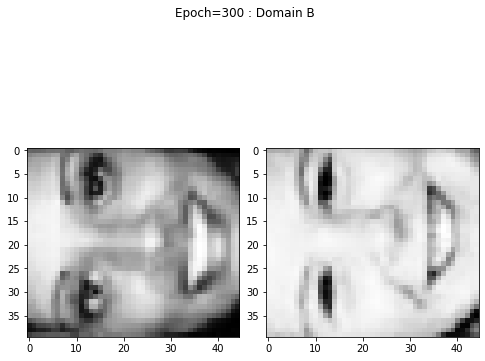

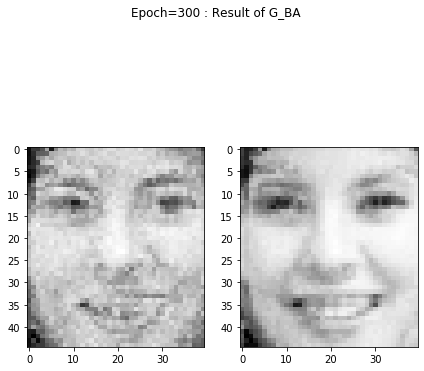

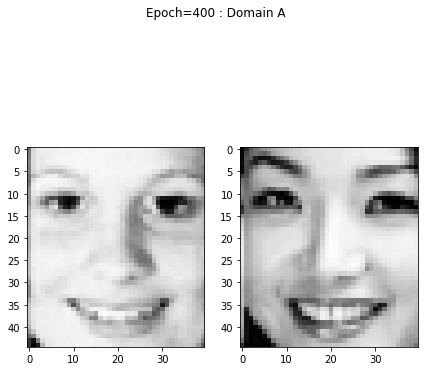

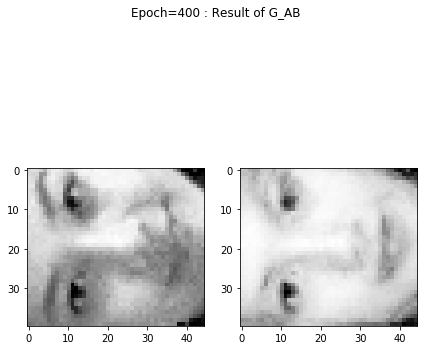

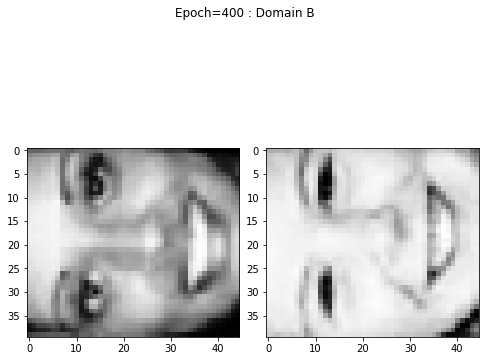

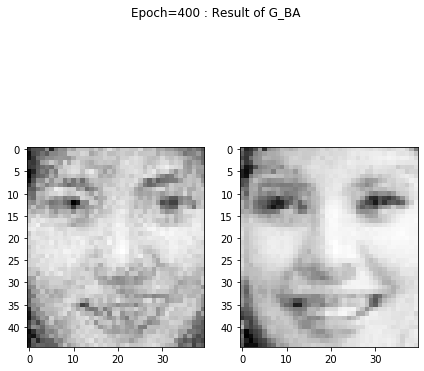

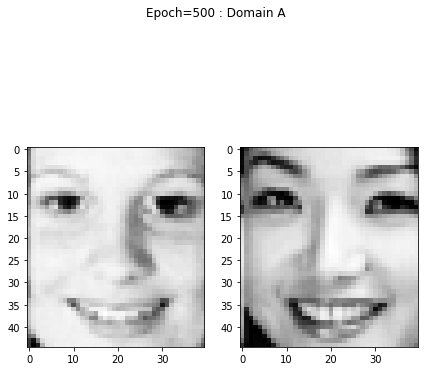

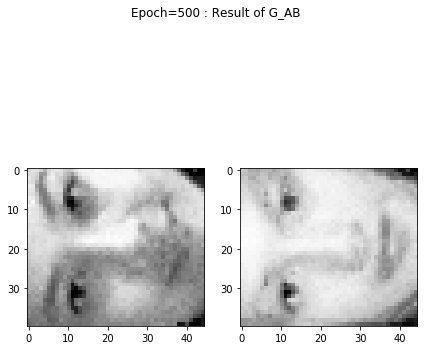

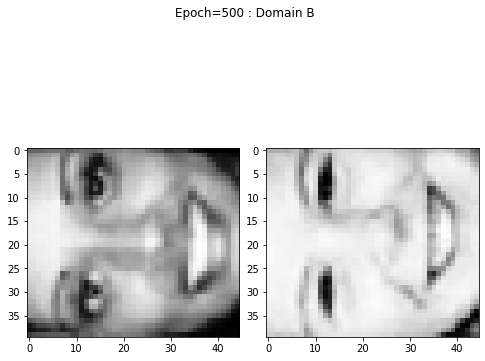

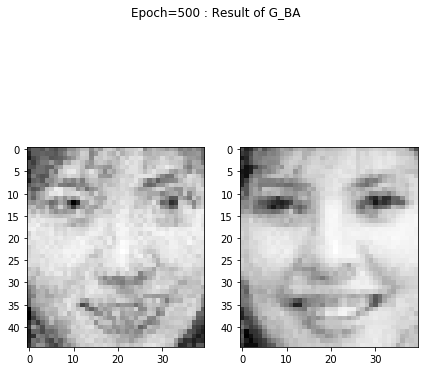

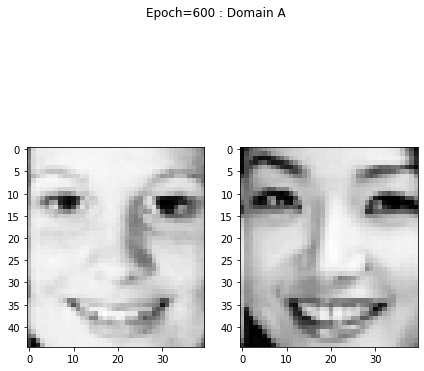

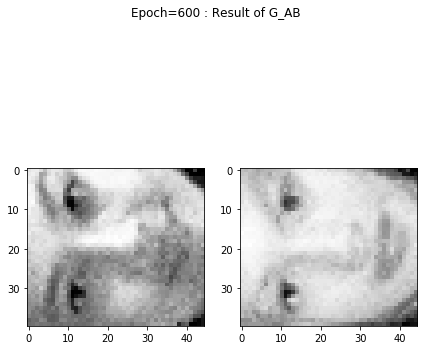

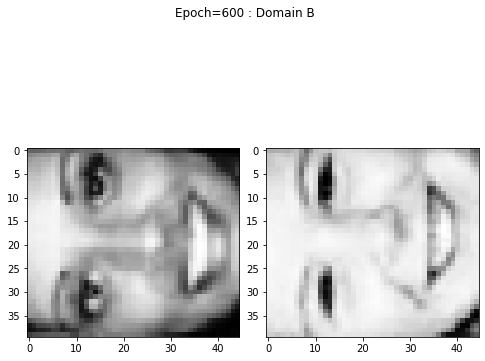

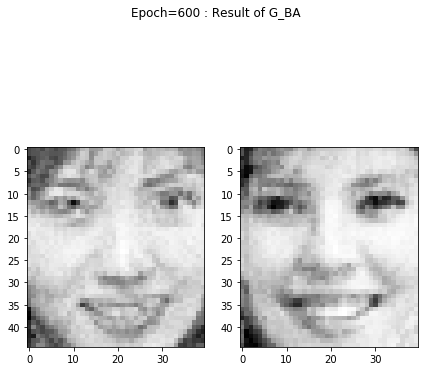

In [95]:
#------------------------------------------------
# 텐서플로 그래프 생성 및 학습 
#------------------------------------------------

sess = tf.Session(); 
sess.run(tf.global_variables_initializer())
losses = []
for epoch in range(epochs):
    total_batch = int(sample_size / batch_size)
    avg_loss=0
    for i in range(total_batch):
        
        XrA = X_trainA[i * batch_size : (i + 1) * batch_size]
        XrB = X_trainB[i * batch_size : (i + 1) * batch_size]
        
        DA_loss_curr, _ = sess.run([DA_loss, DA_solver], 
                                    feed_dict={
                                        X_A : XrA, 
                                        X_B : XrB
                                    })
        DB_loss_curr, _ = sess.run([DB_loss, DB_solver], 
                                    feed_dict={
                                        X_A : XrA, 
                                        X_B : XrB
                                    })
        G_loss_curr, _ = sess.run([G_loss, G_solver], 
                                  feed_dict={
                                      X_A : XrA, 
                                      X_B : XrB
                                  })
        losss = DA_loss_curr + DB_loss_curr + G_loss_curr
        avg_loss += losss / total_batch
    print('Epoch: {:d}'.format(epoch + 1))
    print('  DiscriminatorA Loss = {:.4f}'.format(DA_loss_curr), end='')
    print('  DiscriminatorB Loss = {:.4f}'.format(DB_loss_curr), end='')
    print('  Generator Loss = {:.4f}'.format(G_loss_curr), end='')
    print('  Avg Loss = {:.4f}'.format(avg_loss))
    losses.append((DA_loss_curr, DB_loss_curr, G_loss_curr, avg_loss))
    # 100 에폭마다 변형되는 이미지 그림
    if (epoch + 1) % 100 == 0:  
        samples_A = sess.run(X_BA, feed_dict={X_B : XB})
        samples_B = sess.run(X_AB, feed_dict={X_A : XA})
        # 도메인  A의 test 이미지
        f, axes = plt.subplots(figsize=(7, 7), nrows=1, ncols=2, 
                              sharey=True, sharex=True)
        for i in range(2):
            plt.subplot(1, 2, i + 1); plt.suptitle('Epoch={:d} : Domain A'.format(epoch + 1)) 
            plt.imshow(XA[i].reshape(45, 40), 'Greys_r')
        # G_AB(X_A) 결과               
        f, axes = plt.subplots(figsize=(7, 7), nrows=1, ncols=2, 
                               sharey=True, sharex=True)      
        for i in range(2):
            plt.subplot(1, 2, i + 1); plt.suptitle('Epoch={:d} : Result of G_AB'.format(epoch + 1)) 
            plt.imshow(samples_B[i].reshape(40, 45), 'Greys_r')
        # 도메인  B의 test 이미지
        f, axes = plt.subplots(figsize=(7, 7), nrows=1, ncols=2, 
                               sharey=True, sharex=True)
        f.suptitle(epoch + 1)
        f.tight_layout()
        for i in range(2):
            plt.subplot(1, 2, i + 1); plt.suptitle('Epoch={:d} : Domain B'.format(epoch + 1)) 
            plt.imshow(XB[i].reshape(40, 45), 'Greys_r')
        # G_BA(X_B) 결과          
        f, axes = plt.subplots(figsize=(7, 7), nrows=1, ncols=2, 
                               sharey=True, sharex=True)     
        for i in range(2):
            plt.subplot(1, 2, i + 1); plt.suptitle('Epoch={:d} : Result of G_BA'.format(epoch + 1))
            plt.imshow(samples_A[i].reshape(45, 40), 'Greys_r')

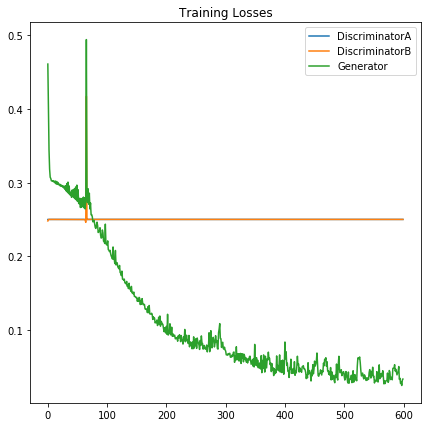

In [91]:
# 판별자, 생성자의 비용함수 그림 
fig, ax = plt.subplots(figsize=(7, 7))
losses = np.array(losses)
plt.plot(losses.T[0], label='DiscriminatorA')
plt.plot(losses.T[1], label='DiscriminatorB')
plt.plot(losses.T[2], label='Generator')
plt.title("Training Losses")
plt.legend()

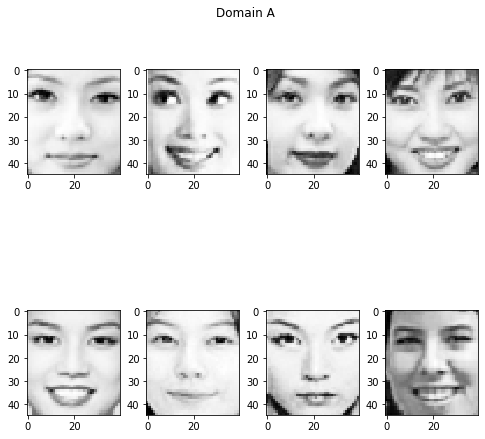

In [92]:
# 도메인 A 에 속하는 이미지
f, axes = plt.subplots(figsize=(7,7), nrows=2, ncols=4, 
                     sharey=True, sharex=True)
f.tight_layout()
for i in range(8):
    plt.subplot(2, 4, i + 1); f.suptitle('Domain A')
    plt.imshow(X_trainA[i].reshape(45, 40), 'Greys_r')

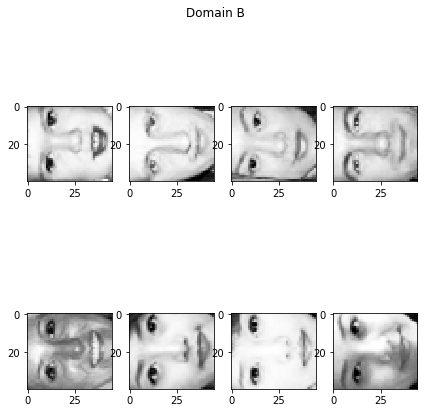

In [93]:
# 도메인 B 에 속하는 이미지    
f,axes =plt.subplots(figsize=(7, 7), nrows=2, ncols=4, 
                     sharey=True, sharex=True)
for i in range(8):
    plt.subplot(2, 4, i + 1); f.suptitle('Domain B') 
    plt.imshow(X_trainB[i].reshape(40, 45), 'Greys_r')

In [99]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(32, input_shape=(11,11,1), 
                 strides=(4,4), kernel_size=(6,6), padding='SAME'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 3, 3, 32)          1184      
Total params: 1,184
Trainable params: 1,184
Non-trainable params: 0
_________________________________________________________________


In [100]:
model = Sequential()
model.add(Conv2D(3, input_shape=(3,3,1), 
                 strides=(1,1), kernel_size=(2,2), padding='SAME'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 3, 3, 3)           15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
